In [62]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import fiona
from shapely.geometry import Polygon, MultiLineString, shape, MultiPoint
 
# we can inspect the shapefile of the metro stops in vienna
for point in fiona.open('UBAHN/UBAHNHALTOGDPoint.shp'):
    print point

{'geometry': {'type': 'Point', 'coordinates': (16.313438744509632, 48.13688046529018)}, 'type': 'Feature', 'id': '0', 'properties': OrderedDict([(u'OBJECTID', 4588.0), (u'LINFO', 6.0), (u'HSTNR', None), (u'HTXT', u'Perfektastra\xdfe'), (u'HBEM', None), (u'EROEFFNUNG', 1995.0), (u'EROEFFNUN0', 4.0)])}
{'geometry': {'type': 'Point', 'coordinates': (16.295795071712917, 48.18940650800911)}, 'type': 'Feature', 'id': '1', 'properties': OrderedDict([(u'OBJECTID', 4589.0), (u'LINFO', 4.0), (u'HSTNR', None), (u'HTXT', u'Braunschweiggasse'), (u'HBEM', None), (u'EROEFFNUNG', 1981.0), (u'EROEFFNUN0', 12.0)])}
{'geometry': {'type': 'Point', 'coordinates': (16.34426831976529, 48.22127508635545)}, 'type': 'Feature', 'id': '2', 'properties': OrderedDict([(u'OBJECTID', 4590.0), (u'LINFO', 6.0), (u'HSTNR', None), (u'HTXT', u'Michelbeuern-AKH'), (u'HBEM', None), (u'EROEFFNUNG', 1989.0), (u'EROEFFNUN0', 10.0)])}
{'geometry': {'type': 'Point', 'coordinates': (16.41135109612752, 48.229221559317196)}, 'type'

In [63]:
# We can extract the stops for each metro line by filtering for the LINFO property

linestops = {}
for line in[1.0, 2.0, 3.0, 4.0, 6.0]:
    linestops[line] = MultiPoint(
                    [shape(point['geometry']) for point in fiona.open('UBAHN/UBAHNHALTOGDPoint.shp')
                    if point['properties']['LINFO'] == line])
 
print linestops

{1.0: <shapely.geometry.multipoint.MultiPoint object at 0x7fe5bfbc9c90>, 2.0: <shapely.geometry.multipoint.MultiPoint object at 0x7fe5bfbc9dd0>, 3.0: <shapely.geometry.multipoint.MultiPoint object at 0x7fe5bfbc95d0>, 4.0: <shapely.geometry.multipoint.MultiPoint object at 0x7fe5b1160f10>, 6.0: <shapely.geometry.multipoint.MultiPoint object at 0x7fe5bfbc9a90>}


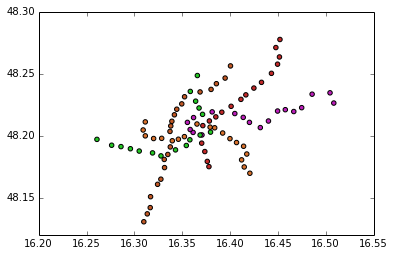

In [64]:
%matplotlib inline
# line colors
lcolors = {1.0: "#c32929",
           2.0: "#bc1dba",
           3.0: "#d9712c",
           4.0: "#23c923",
           6.0: "#c15825"}
# plot the stops
fig = plt.figure(1)
ax = fig.add_subplot(111)
for line in linestops:
    xs = []
    ys = []
    for point in linestops[line]:
        x, y = point.xy
        xs.append(x)
        ys.append(y)
    
    ax.scatter(xs,ys,c=lcolors[line])
        
plt.show()
    
    
    
    
    

In [65]:
# we can inspect the shapefile of the metro lines in vienna
for line in fiona.open('UBAHN/UBAHNOGDLine.shp'):
    print line

{'geometry': {'type': 'LineString', 'coordinates': [(16.3685486650829, 48.23520989049319), (16.37508786254434, 48.235302183495605), (16.375591622805878, 48.23530510050114), (16.375773781028673, 48.23532451864201), (16.375925716803348, 48.23534713954208), (16.376072335929585, 48.23537904120818), (16.376511522782174, 48.23553634918887), (16.377128124521395, 48.2358156299686), (16.377994400378146, 48.23622867940986), (16.380122184157734, 48.23724949887222)]}, 'type': 'Feature', 'id': '0', 'properties': OrderedDict([(u'OBJECTID', 2649.0), (u'LINFO', 6.0), (u'EROEFFNUNG', None), (u'EROEFFNUN0', None)])}
{'geometry': {'type': 'LineString', 'coordinates': [(16.327562024265983, 48.18364117545797), (16.32799923101966, 48.18363674718197), (16.328543600991758, 48.183636784028536), (16.329013477395893, 48.183637127623285), (16.329967572208574, 48.18365123668213), (16.330998157021682, 48.183649288320964), (16.331206231556557, 48.18365070292065), (16.331429017649487, 48.18365773939549), (16.33159715

In [66]:
lines = {}
for line in[1.0, 2.0, 3.0, 4.0, 6.0]:
    lines[line] = MultiLineString(
                    [shape(ml['geometry']) for ml in fiona.open('UBAHN/UBAHNOGDLine.shp')
                    if ml['properties']['LINFO'] == line])
 
print lines

{1.0: <shapely.geometry.multilinestring.MultiLineString object at 0x7fe5bfe99e90>, 2.0: <shapely.geometry.multilinestring.MultiLineString object at 0x7fe5bfe998d0>, 3.0: <shapely.geometry.multilinestring.MultiLineString object at 0x7fe5bfe99890>, 4.0: <shapely.geometry.multilinestring.MultiLineString object at 0x7fe5bfe99450>, 6.0: <shapely.geometry.multilinestring.MultiLineString object at 0x7fe5bfe99a90>}


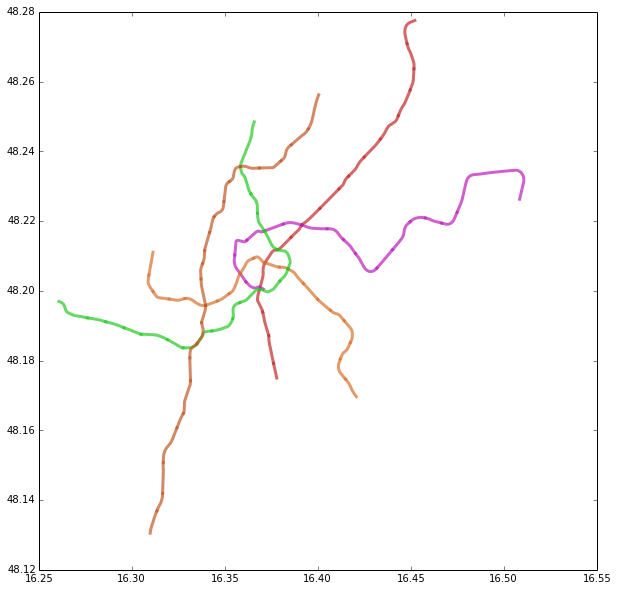

In [67]:
# plot the stops
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for line in lines:
    for ml in lines[line]:
        x, y = ml.xy
        ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7)
        
plt.show()
    

In [68]:
# Districts

# we can inspect the shapefile of the districts
for district in fiona.open('Bezirke/BEZIRKSGRENZEOGDPolygon.shp'):
    print district['properties']

OrderedDict([(u'NAMEK', u'Landstra\xdfe'), (u'BEZNR', 3.0), (u'BEZ_RZ', u'III'), (u'NAMEK_NUM', u'3., Landstra\xdfe'), (u'NAMEK_RZ', u'III. Landstra\xdfe'), (u'NAMEG', u'LANDSTRASSE'), (u'LABEL', u'III.'), (u'BEZ', u'03'), (u'DISTRICT_C', 1030.0), (u'STATAUSTRI', 903.0), (u'STATAUSTR0', 90301.0), (u'FLAECHE', 7397707.7514), (u'UMFANG', 13969.84), (u'AKT_TIMEST', '2015-05-29'), (u'SE_SDO_ROW', 5762.0)])
OrderedDict([(u'NAMEK', u'Josefstadt'), (u'BEZNR', 8.0), (u'BEZ_RZ', u'VIII'), (u'NAMEK_NUM', u'8., Josefstadt'), (u'NAMEK_RZ', u'VIII. Josefstadt'), (u'NAMEG', u'JOSEFSTADT'), (u'LABEL', u'VIII.'), (u'BEZ', u'08'), (u'DISTRICT_C', 1080.0), (u'STATAUSTRI', 908.0), (u'STATAUSTR0', 90801.0), (u'FLAECHE', 1089945.7227), (u'UMFANG', 4170.3), (u'AKT_TIMEST', '2015-05-29'), (u'SE_SDO_ROW', 5763.0)])
OrderedDict([(u'NAMEK', u'Innere Stadt'), (u'BEZNR', 1.0), (u'BEZ_RZ', u'I'), (u'NAMEK_NUM', u'1., Innere Stadt'), (u'NAMEK_RZ', u'I. Innere Stadt'), (u'NAMEG', u'INNERE STADT'), (u'LABEL', u'I.'),

In [69]:
# Districts
districts = {}
# we can inspect the shapefile of the districts
for district in fiona.open('Bezirke/BEZIRKSGRENZEOGDPolygon.shp'):
    districts[district['properties']['BEZNR']] = Polygon(shape(district['geometry']))

print districts

{1.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147e10>, 2.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147650>, 3.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147950>, 4.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143ddd0>, 5.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143d810>, 6.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143d850>, 7.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143d410>, 8.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147d90>, 9.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147850>, 10.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143d990>, 11.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143db50>, 12.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143ded0>, 13.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143d3d0>, 14.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b1147210>, 15.0: <shapely.geometry.polygon.Polygon object at 0x7fe5b143da10>, 16.

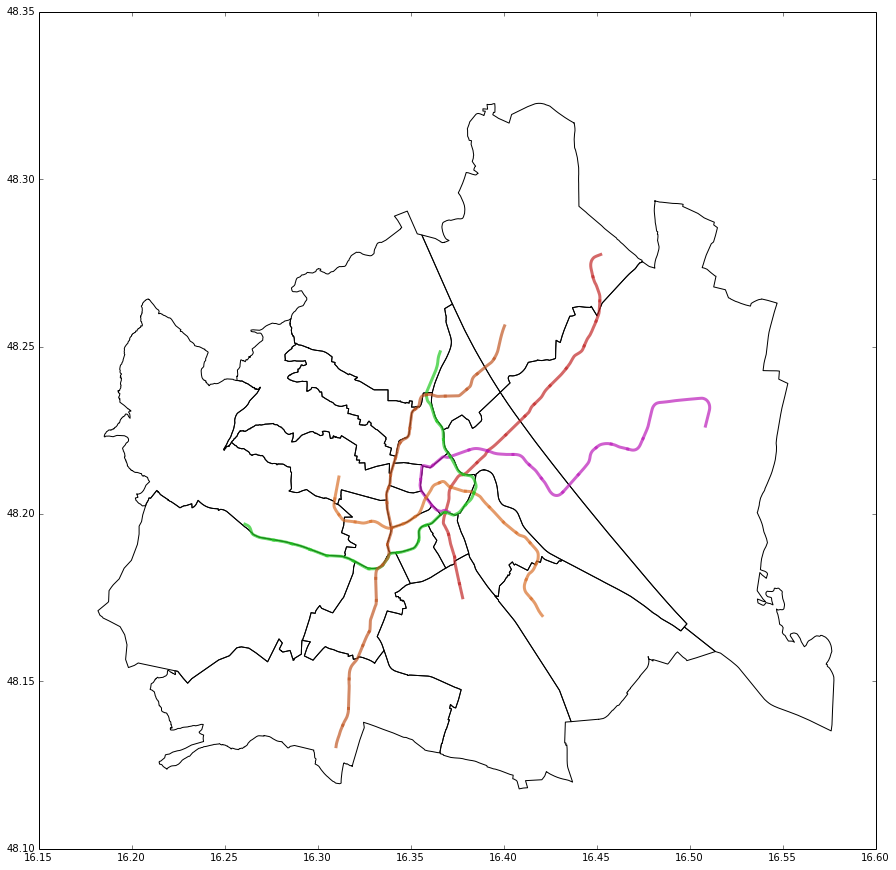

In [70]:
# plot the districts as a background
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for nr in districts:
    x, y = districts[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
        
for line in lines:
    for ml in lines[line]:
        x, y = ml.xy
        ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)
plt.show()

In [71]:
# find out through which districts the U3 goes

crosses = []
u3 = lines[3.0]
for nr in districts:
    if u3.crosses(districts[nr]):
       crosses.append(nr)

print(crosses)
    

[1.0, 3.0, 6.0, 7.0, 11.0, 14.0, 15.0, 16.0]


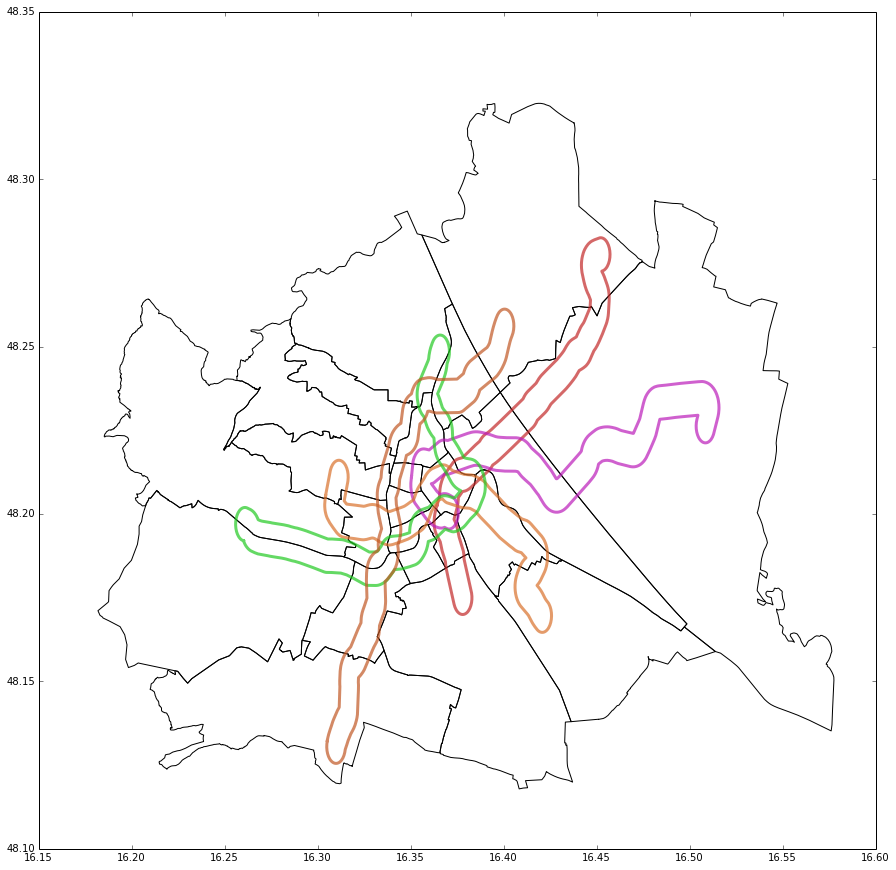

In [72]:
# imagine you are afraid of metro lines and don't want a flat
# near one.
# create a buffer around the metro lines

buffered_lines = {}

# our data is in lon, lat so buffers are also in lon, lat
# 0.001 degree is approx 100m (differs in longitude and latitude)
# ideally we would reproject our dataset before doing serious GIS
# operations
for line in lines:
    buffered_lines[line] = lines[line].buffer(0.001*5)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for nr in districts:
    x, y = districts[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
        
for line in buffered_lines:
    x, y = buffered_lines[line].exterior.xy
    ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)
plt.show()

In [73]:
# we can now substract the buffered lines from the district polygons

In [74]:
# Example count the number of metro stations in each district